In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("Border_Crossing_Entry_Data.csv")


In [13]:
df.head()
df.tail()
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405972 entries, 0 to 405971
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  405972 non-null  object 
 1   State      405967 non-null  object 
 2   Port Code  405972 non-null  int64  
 3   Border     405972 non-null  object 
 4   Date       405972 non-null  object 
 5   Measure    405972 non-null  object 
 6   Value      405972 non-null  int64  
 7   Latitude   405965 non-null  float64
 8   Longitude  405965 non-null  float64
 9   Point      405965 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 21.7+ MB


,Port Code,Value,Latitude,Longitude
count,405972.000000,4.059720e+05,405965.000000,405965.000000
mean,2444.899609,2.913417e+04,43.957365,-99.701705
std,1204.678485,1.494534e+05,8.155044,18.262828
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2304.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.550000e+02,48.122000,-101.628000
75%,3401.000000,3.113000e+03,49.000000,-84.361000
max,3814.000000,4.447374e+06,62.615000,-66.980000


In [14]:
print(df.isnull().sum())

Port Name    0
State        5
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     7
Longitude    7
Point        7
dtype: int64


In [16]:
print(df.duplicated().sum())

10


In [17]:
df_clean= df.copy()
df_clean.columns =(
    df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(" ","_")
)

df_clean.columns

Index(['port_name', 'state', 'port_code', 'border', 'date', 'measure', 'value',
       'latitude', 'longitude', 'point'],
      dtype='object')

In [18]:
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

for col in cat_cols:
    print(f"\nValue counts for '{col}': ")
    print(df[col].value_counts())

Categorical columns: ['Port Name', 'State', 'Border', 'Date', 'Measure', 'Point']
Numeric columns: ['Port Code', 'Value', 'Latitude', 'Longitude']

Value counts for 'Port Name': 
Port Name
Eastport                    6881
Buffalo Niagara Falls       4283
International Falls         4262
Nogales                     4260
Sumas                       4260
                            ... 
Cross Border Xpress           96
Chief Mountain Mt Poe          4
Aberdeen                       1
Albany                         1
Detroit Metropltn Airprt       1
Name: count, Length: 120, dtype: int64

Value counts for 'State': 
State
North Dakota    65244
Washington      51967
Maine           44658
Texas           43385
Montana         43355
Minnesota       26882
New York        24966
Arizona         22709
California      22207
Vermont         19489
Alaska          13029
Michigan        12634
Idaho            7821
New Mexico       7621
Name: count, dtype: int64

Value counts for 'Border': 
Border
US-Ca

In [21]:
critical_cols = ['Port Name', 'State', 'Border', 'Date', 'Measure', 'Value']
df = df.dropna(subset=critical_cols)

In [24]:
print(df['Border'].value_counts())

Border
US-Canada Border    310045
US-Mexico Border     95922
Name: count, dtype: int64


In [30]:
print(df['Measure'].value_counts().head(10))

Measure
Personal Vehicles              38761
Personal Vehicle Passengers    38736
Trucks                         37573
Truck Containers Empty         37277
Truck Containers Loaded        36740
Pedestrians                    33095
Buses                          32059
Bus Passengers                 32040
Trains                         30107
Rail Containers Empty          30085
Name: count, dtype: int64


In [27]:
df.groupby('Border')['Value'].sum()

Border
US-Canada Border    3103065893
US-Mexico Border    8724555516
Name: Value, dtype: int64

In [29]:
df.groupby('Measure')['Value'].mean().sort_values(ascending=False)

Measure
Personal Vehicle Passengers    166916.983091
Personal Vehicles               80638.494518
Pedestrians                     39090.897900
Trucks                           8983.888723
Truck Containers Loaded          6983.988732
Bus Passengers                   4978.323533
Truck Containers Empty           2345.941573
Rail Containers Loaded           1763.097135
Rail Containers Empty            1013.852451
Buses                             296.921707
Train Passengers                  253.940403
Trains                             36.966453
Name: Value, dtype: float64

In [31]:
df.groupby('State')['Value'].sum().sort_values(ascending=False).head(10)

State
Texas           4400753020
California      3141319032
Arizona         1092879527
New York         956477986
Michigan         865074105
Washington       584315162
Maine            256037846
Vermont          132433991
Minnesota        110849917
North Dakota      91564279
Name: Value, dtype: int64

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

<ipython-input-33-7a39b4821dae>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [34]:
df.groupby('Year')['Value'].sum()

Year
1996    429790351
1997    494174198
1998    508588404
1999    538456724
2000    540021542
2001    493083902
2002    475702818
2003    456392653
2004    458220298
2005    450234268
2006    440296022
2007    417587175
2008    399902033
2009    359451762
2010    344246536
2011    332226000
2012    344503916
2013    356218438
2014    363314116
2015    365219998
2016    367484183
2017    372971276
2018    379157157
2019    370200015
2020    200531716
2021    224159112
2022    310481511
2023    347890030
2024    366523458
2025    320591797
Name: Value, dtype: int64

In [35]:
df.groupby('Month')['Value'].mean()

Month
1     27550.356444
2     25691.157028
3     29322.523410
4     28081.507046
5     29530.199724
6     29168.126733
7     31817.839513
8     32499.697738
9     28726.077645
10    29197.722911
11    28402.839418
12    29648.348917
Name: Value, dtype: float64

In [36]:
pd.pivot_table(
    df,
    values='Value',
    index='Measure',
    columns='Border',
    aggfunc='sum'
)

Border,US-Canada Border,US-Mexico Border
Measure,,
Bus Passengers,79370634,80134852
Buses,3335358,6183655
Pedestrians,14495775,1279217491
Personal Vehicle Passengers,1741480316,4724215941
Personal Vehicles,842640099,2282988587
Rail Containers Empty,17622723,12879028
Rail Containers Loaded,41522060,11333829
Train Passengers,7134892,360159
Trains,837850,275099


In [37]:
df.groupby('Port Name')['Value'].sum().sort_values(ascending=False).head(10)

Port Name
San Ysidro               1437926840
El Paso                  1323134502
Laredo                    806819787
Hidalgo                   671907664
Calexico                  626071253
Buffalo Niagara Falls     621733274
Brownsville               618388531
Otay Mesa                 583341801
Detroit                   555544115
Nogales                   489535216
Name: Value, dtype: int64

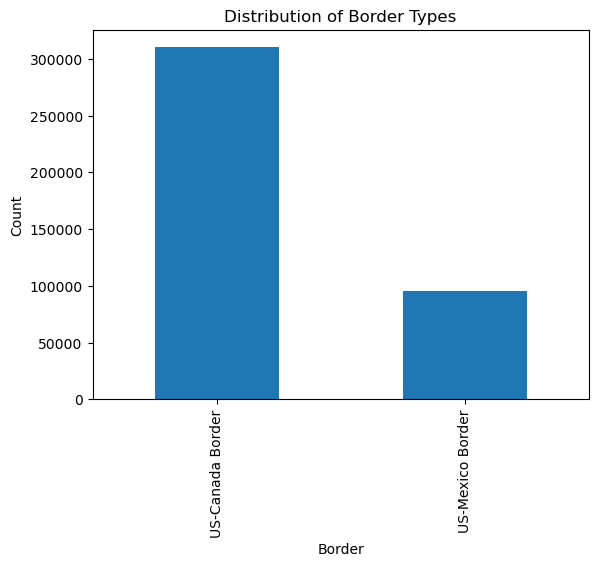

In [42]:
plt.figure()
df['Border'].value_counts().plot(kind='bar')
plt.title("Distribution of Border Types")
plt.xlabel("Border")
plt.ylabel("Count")
plt.show()

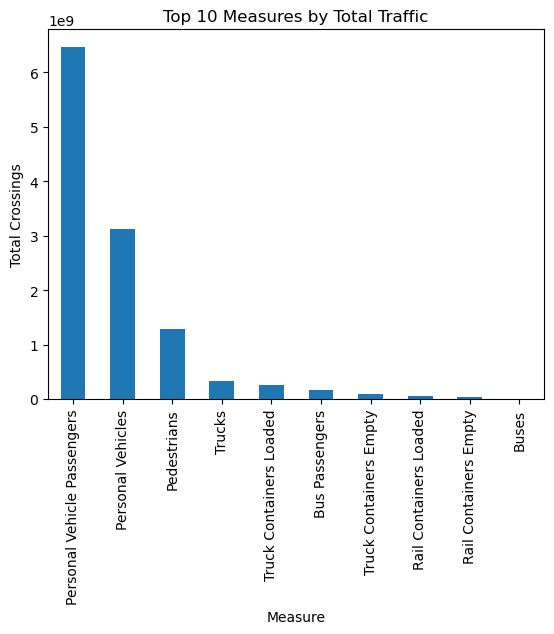

In [44]:
plt.figure()
df.groupby('Measure')['Value'].sum() \
  .sort_values(ascending=False) \
  .head(10) \
  .plot(kind='bar')
plt.title("Top 10 Measures by Total Traffic")
plt.xlabel("Measure")
plt.ylabel("Total Crossings")
plt.show()

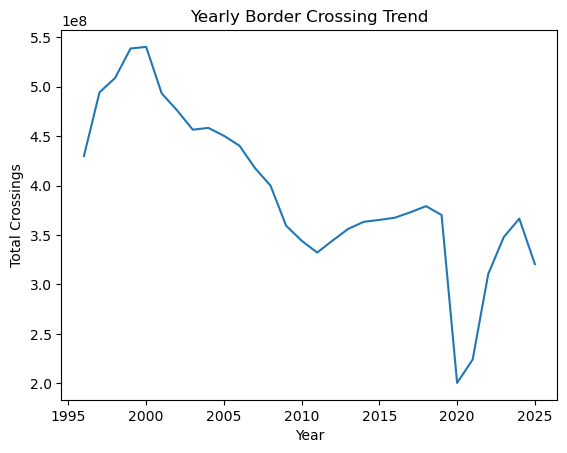

In [47]:
plt.figure()
df.groupby('Year')['Value'].sum(.plot(kind='line')
plt.title("Yearly Border Crossing Trend")
plt.xlabel("Year")
plt.ylabel("Total Crossings")
plt.show()

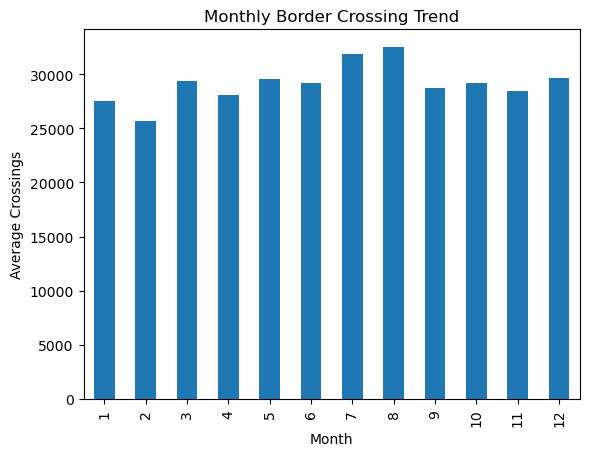

In [51]:
plt.figure()
df.groupby('Month')['Value'].mean().plot(kind='bar')
plt.title("Monthly Border Crossing Trend")
plt.xlabel("Month")
plt.ylabel("Average Crossings")
plt.show()

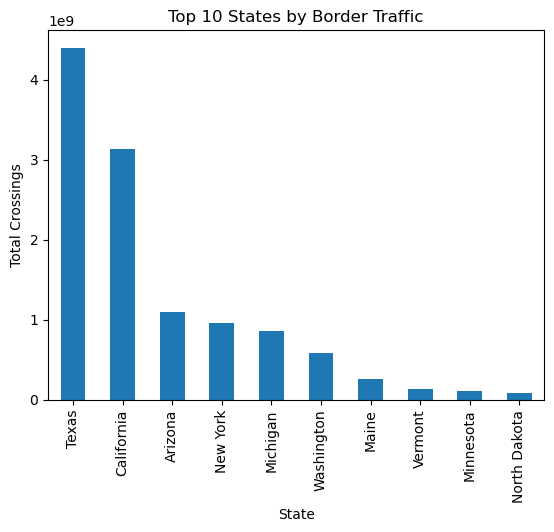

In [52]:
plt.figure()
df.groupby('State')['Value'].sum() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar')
plt.title("Top 10 States by Border Traffic")
plt.xlabel("State")
plt.ylabel("Total Crossings")
plt.show()